# SGD

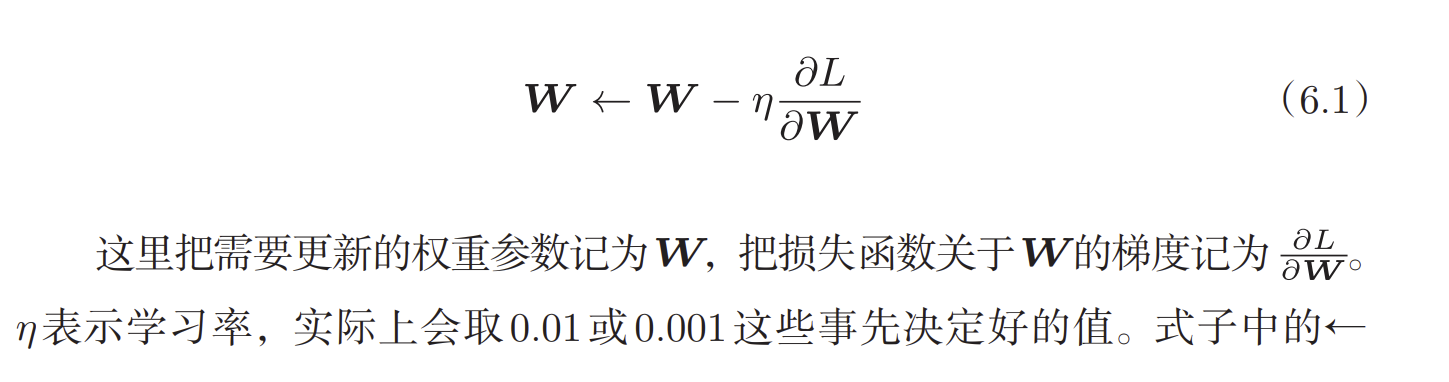

## 缺点
- SGD的缺点是，如果函数的形状非均向（anisotropic），比如呈延伸状，搜索的路径就会非常低效。因此，我们需要比单纯朝梯度方向前进的SGD更聪明的方法。SGD低效的根本原因是，梯度的方向并没有指向最小值的方向。


In [1]:
class SGD:
    def __init__(self, lr=0.01):
        # 学习率
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

# Momentum

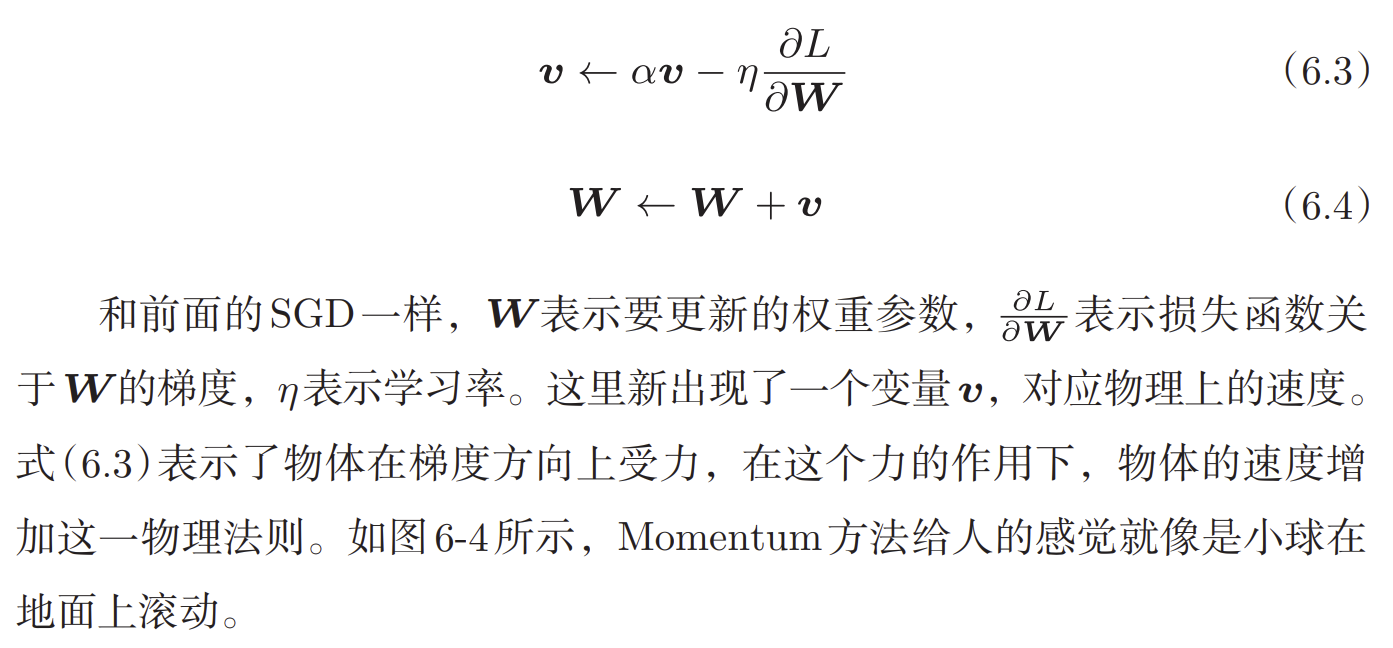

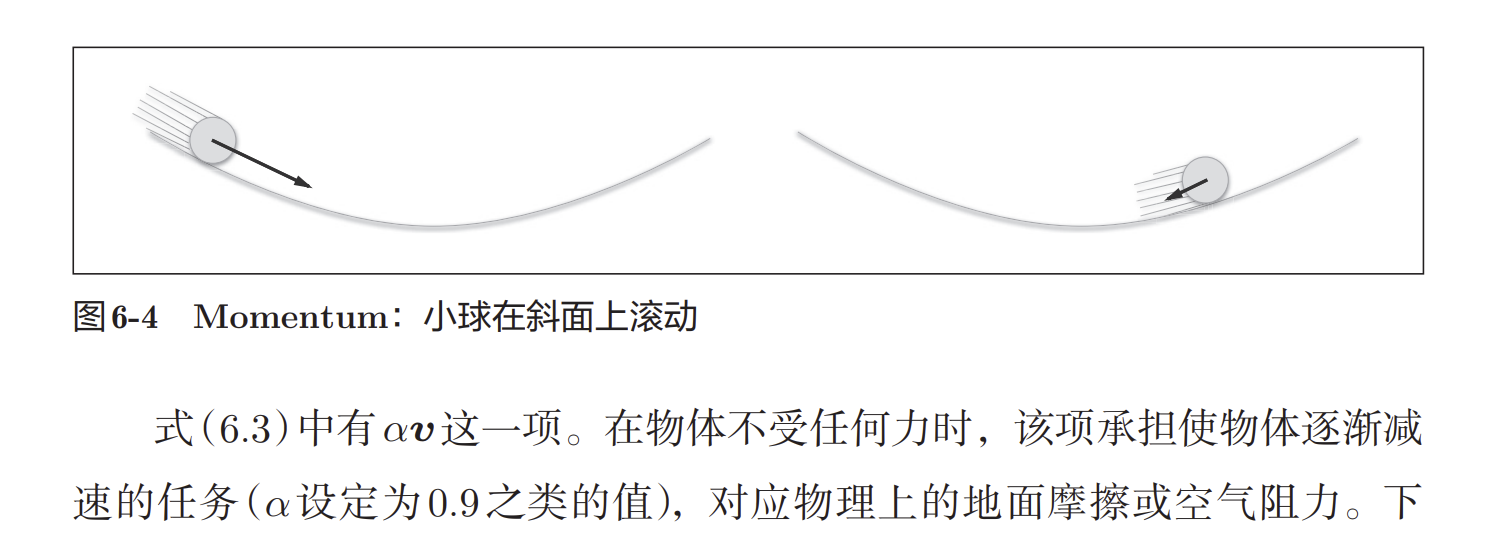

In [2]:
import numpy as np
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]
        

# AdaGrad

- 在神经网络的学习中，学习率（数学式中记为η）的值很重要。学习率过小，会导致学习花费过多时间；反过来，学习率过大，则会导致学习发散而不能正确进行。
- 在关于学习率的有效技巧中，有一种被称为学习率衰减（learning rate decay）的方法，即随着学习的进行，使学习率逐渐减小。实际上，一开始“多”学，然后逐渐“少”学的方法，在神经网络的学习中经常被使用。
- 逐渐减小学习率的想法，相当于将“全体”参数的学习率值一起降低。

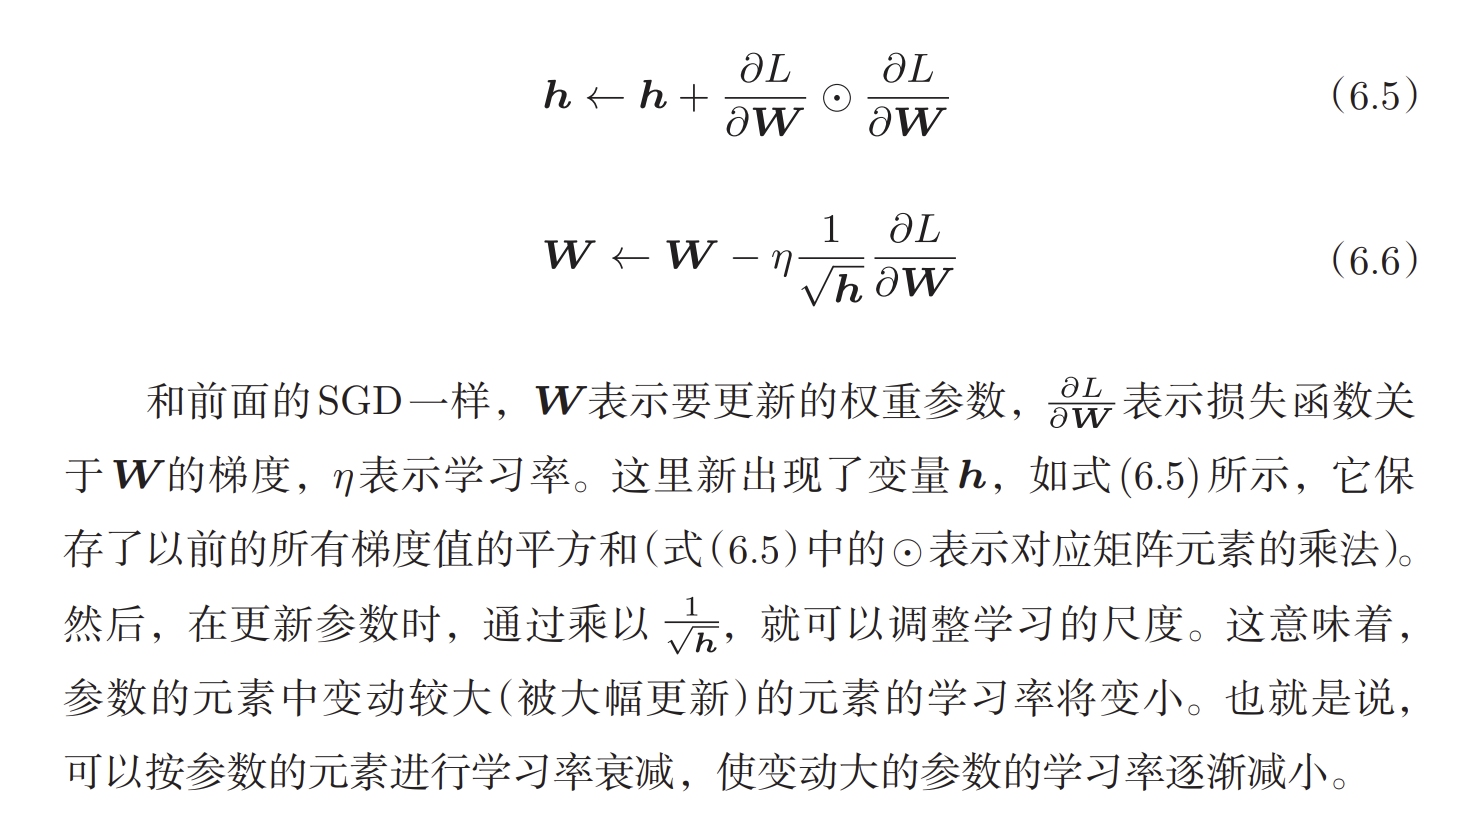
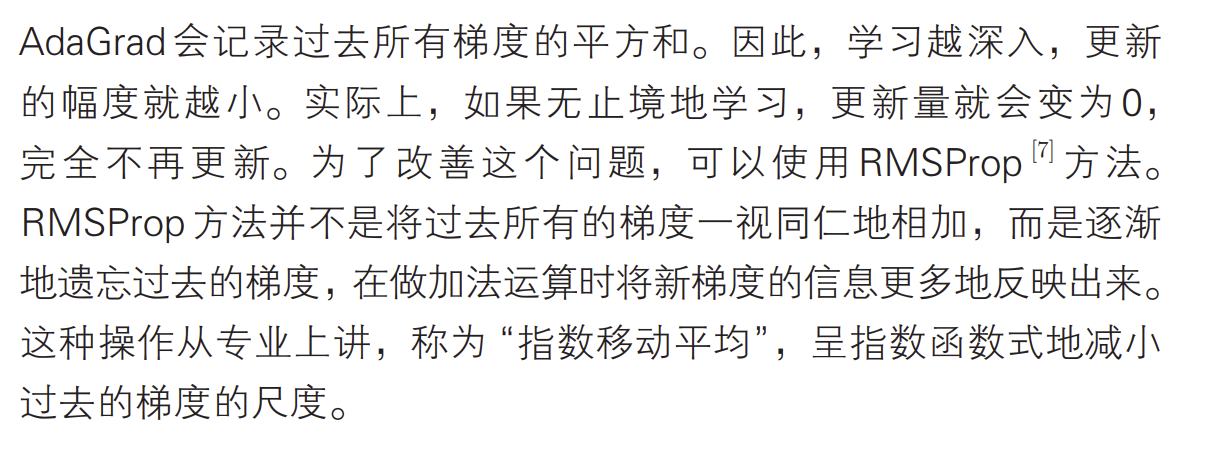

In [3]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
    
        for key in params.keys():
            self.h[key] += grads[key] + grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

# Adam
- 融合了Momentum参照小球在碗中滚动的物理规则进行移动和AdaGrad为参数的每个元素适当地调整更新步伐

In [4]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

# 更新方法对比

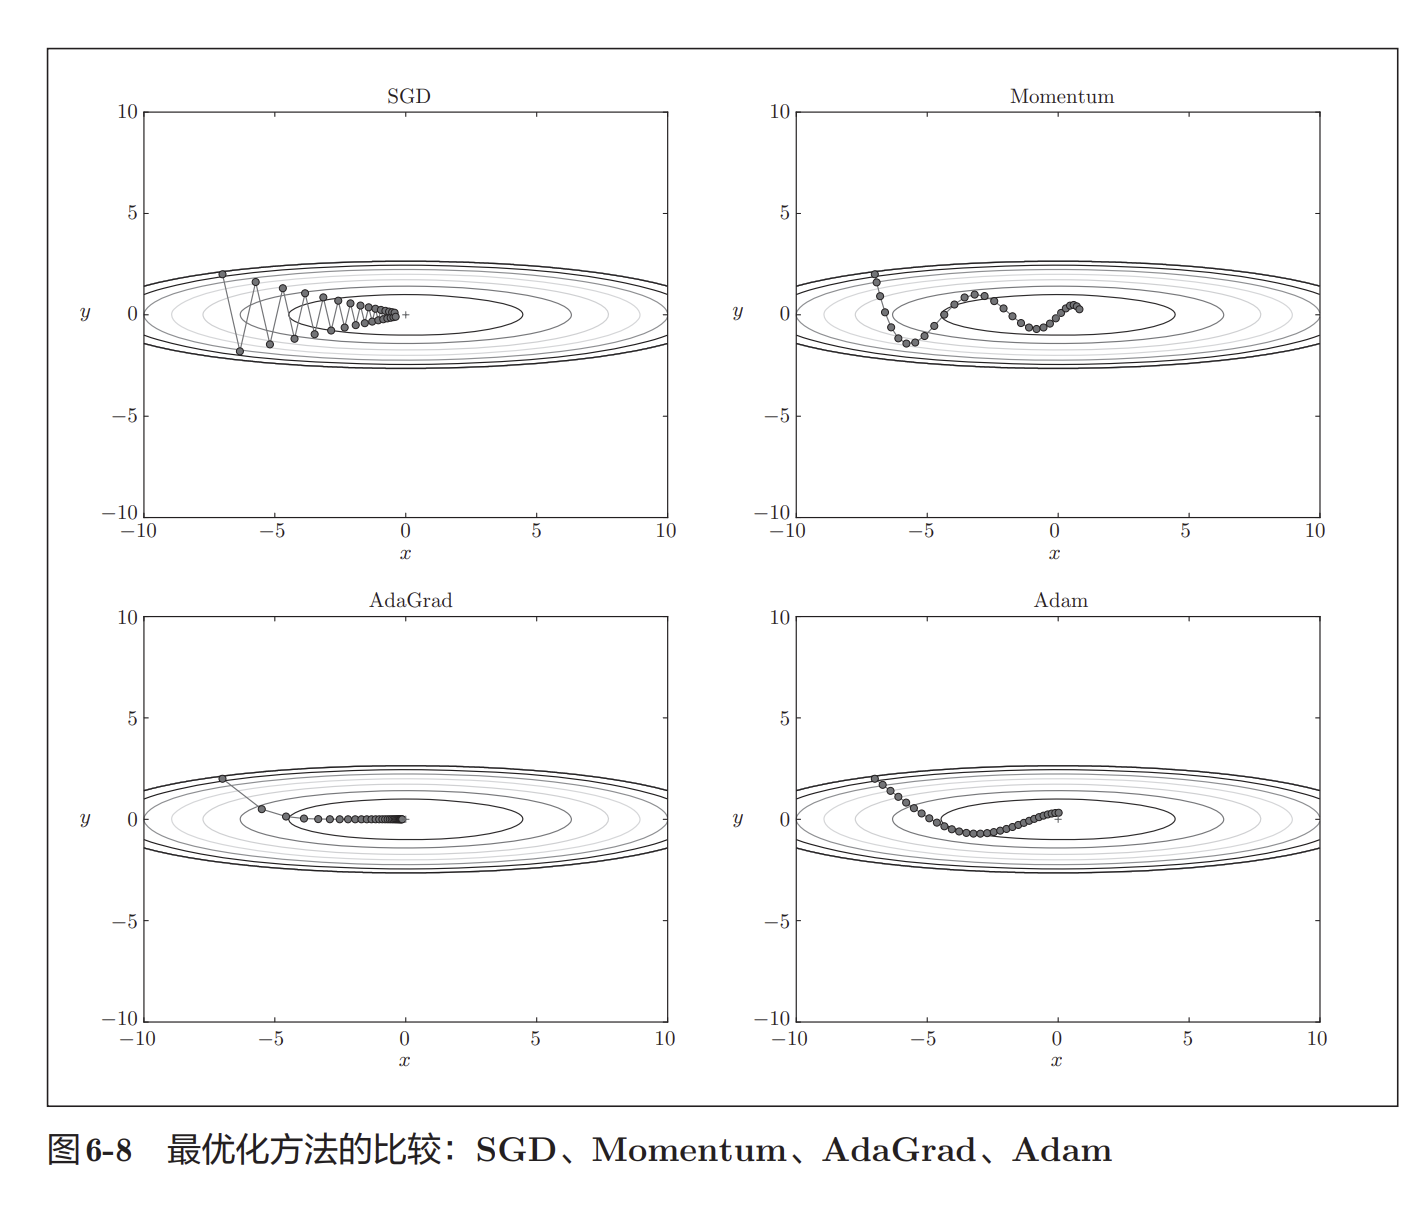

# 权重初始值为什么不能设置为0

- 这是因为在误差反向传播法中，所有的权重值都会进行相同的更新。比如，在2层神经网络中，假设第1层和第2层的权重为0。这样一来，正向传播时，因为输入层的权重为0，所以第2层的神经元全部会被传递相同的值。第2层的神经元中全部输入相同的值，这意味着反向传播时第2层的权重全部都会进行相同的更新（回忆一下“乘法节点的反向传播”的内容）。因此，权重被更新为相同的值，并拥有了对称的值（重复的值）。这使得神经网络拥有许多不同的权重的意义丧失了。为了防止“权重均一化”（严格地讲，是为了瓦解权重的对称结构），必须随机生成初始值。


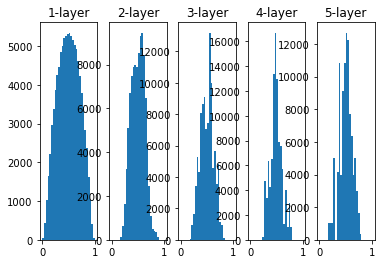

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
#     w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))

plt.show()    

# 梯度消失

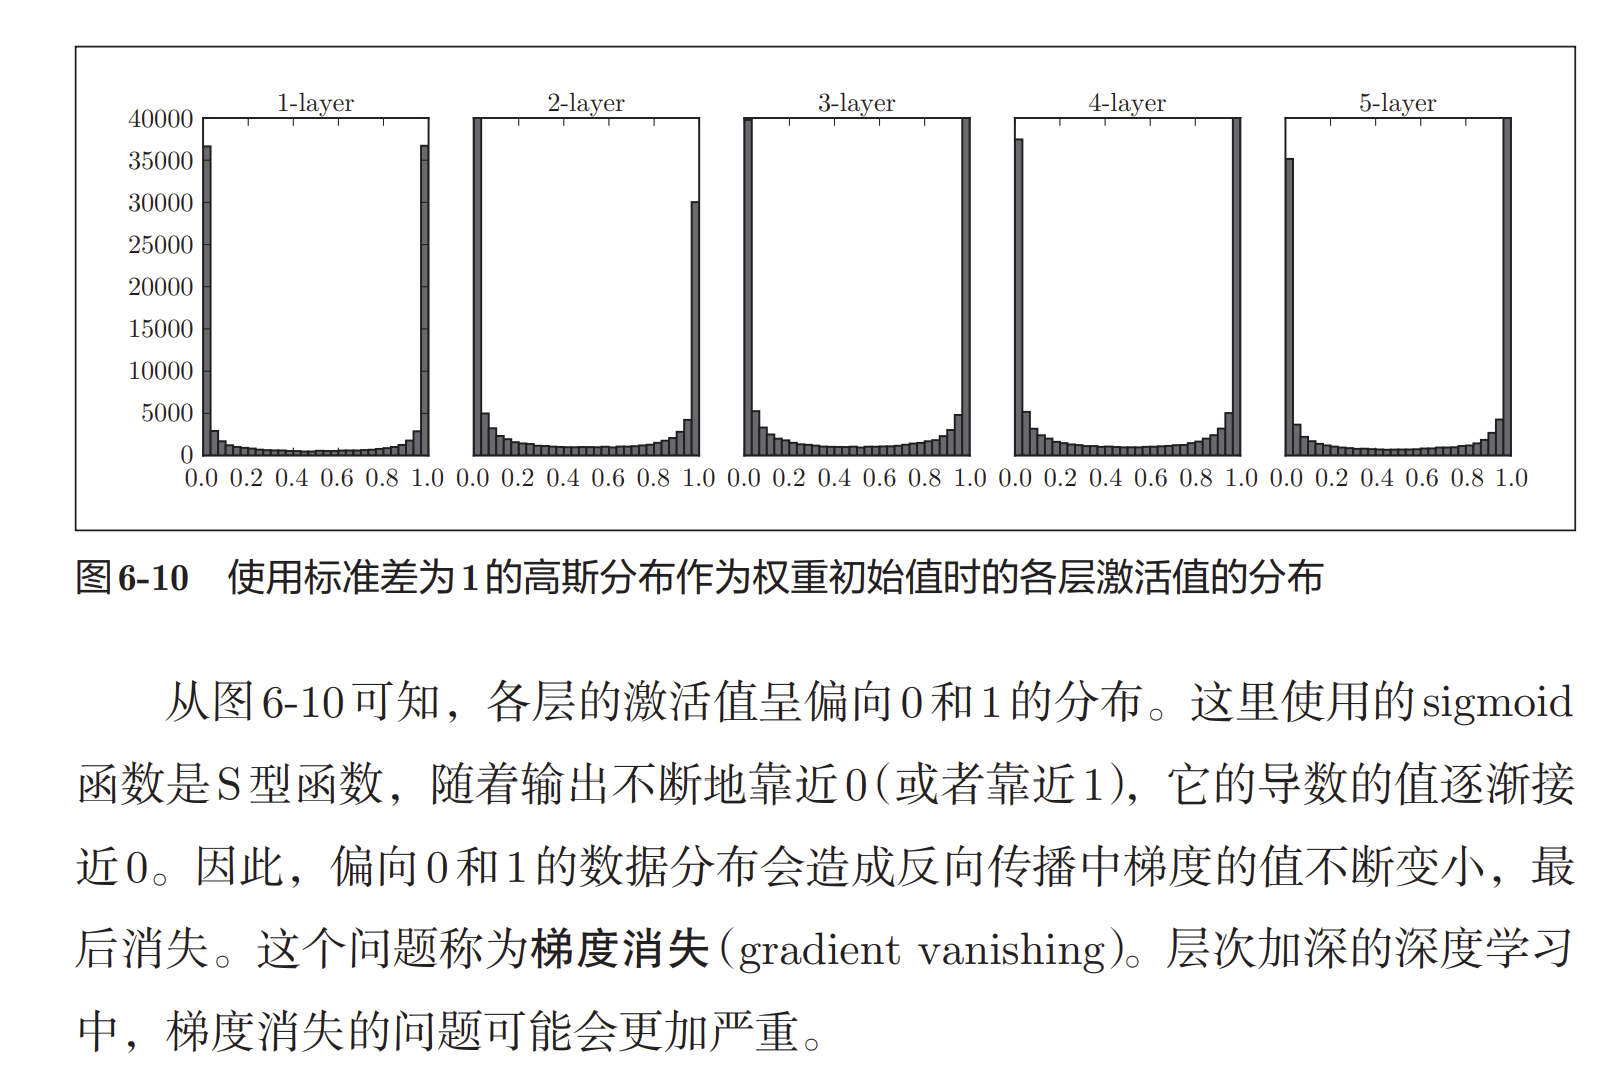

- 各层的激活值的分布都要求有适当的广度。为什么呢？
    - 因为通过在各层间传递多样性的数据，神经网络可以进行高效的学习。反过来，如果传递的是有所偏向的数据，就会出现梯度消失或者“表现力受限”的问题，导致学习可能无法顺利进行
    
- 初试权值

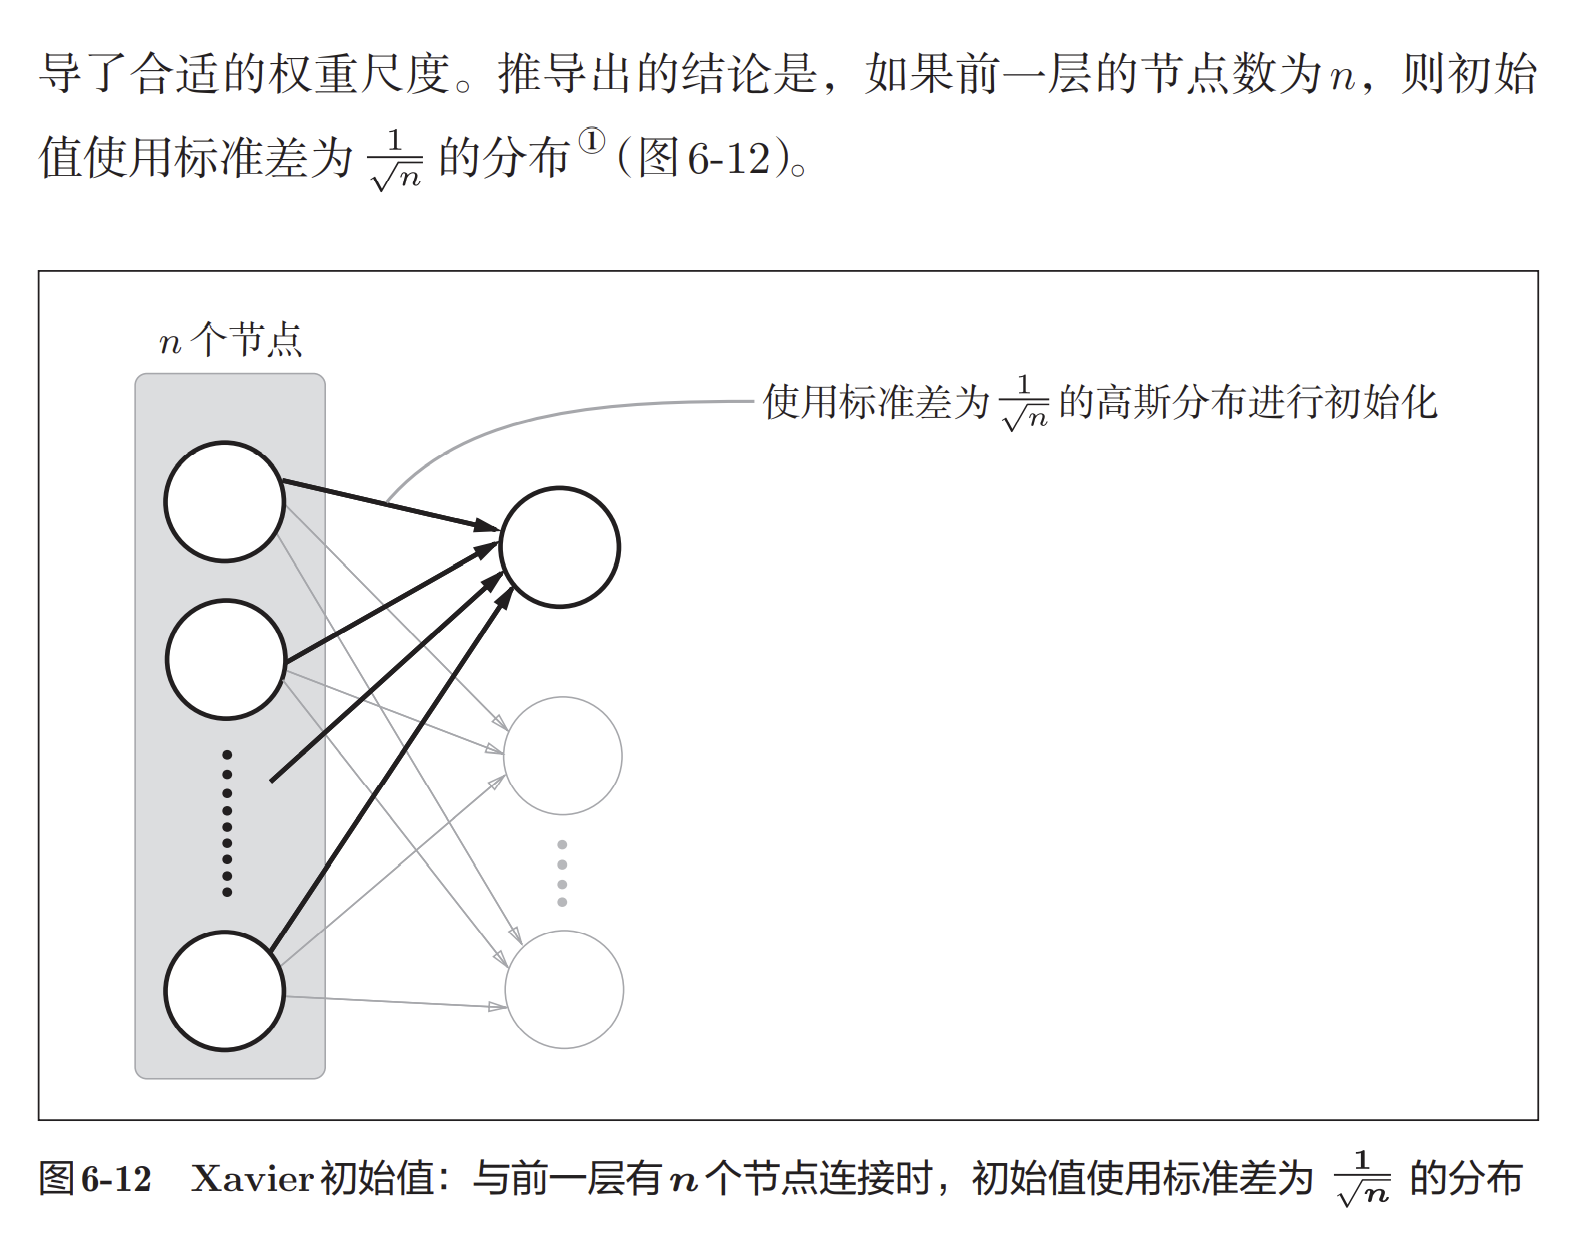

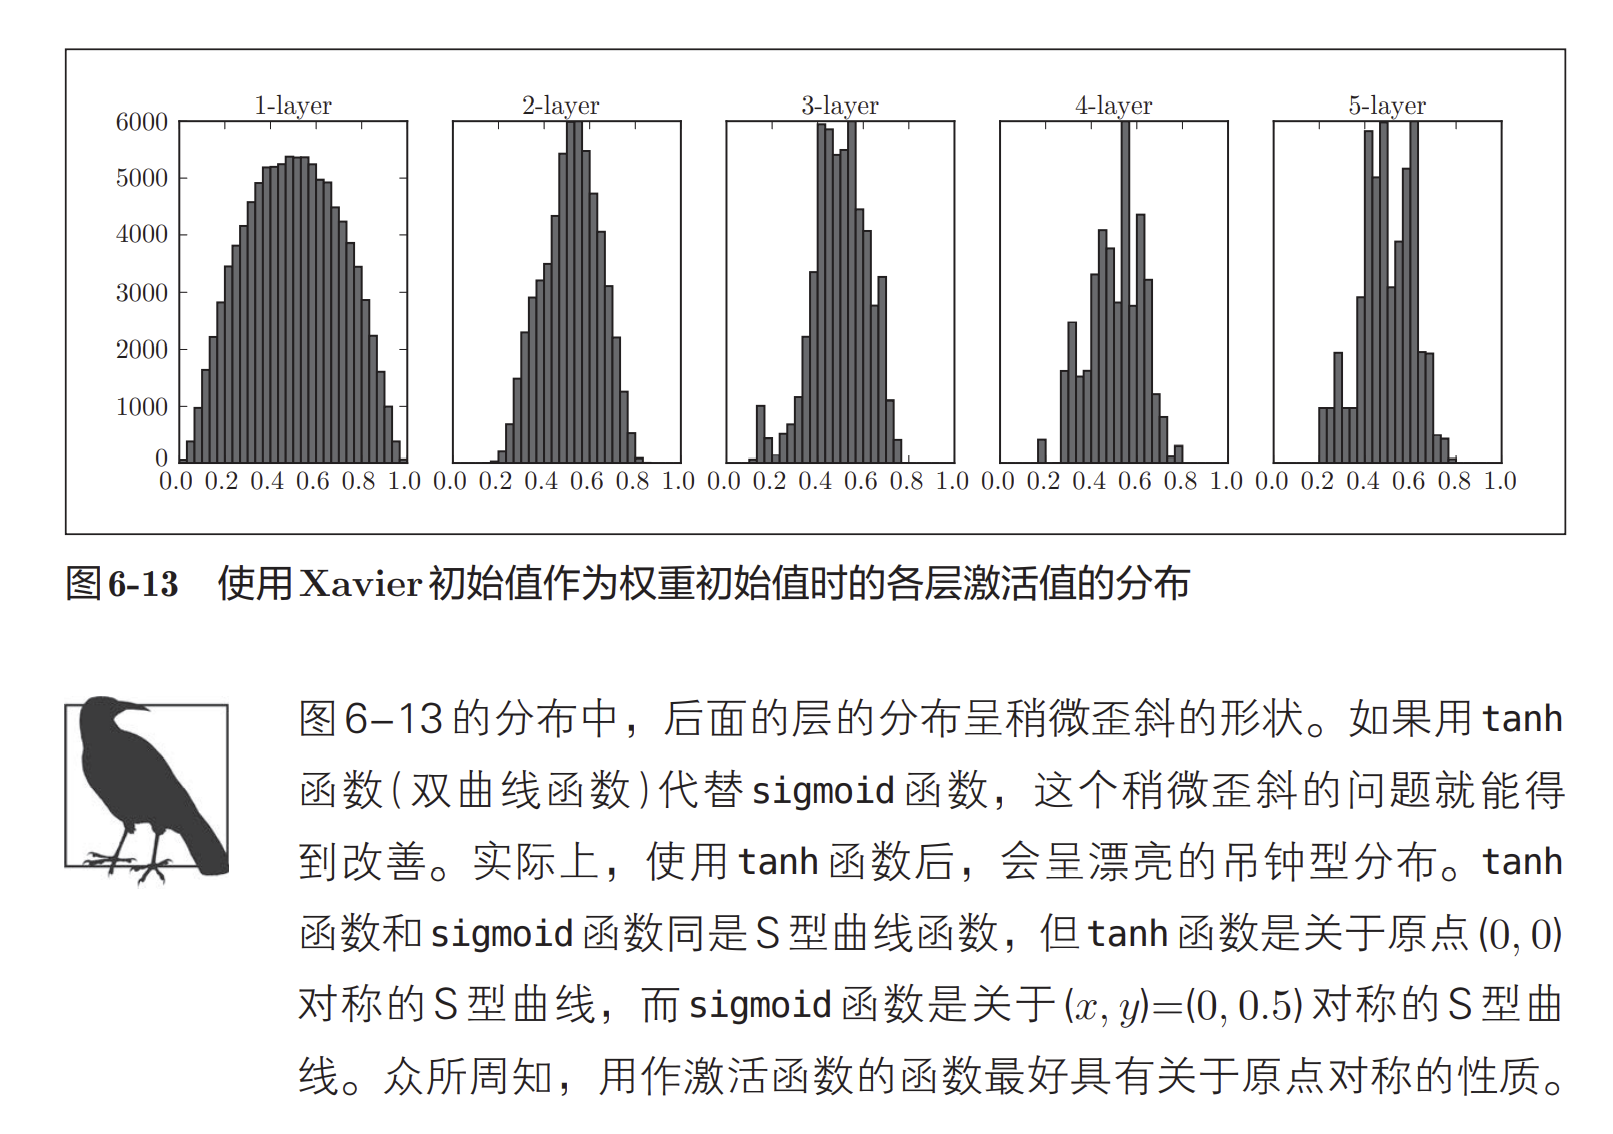

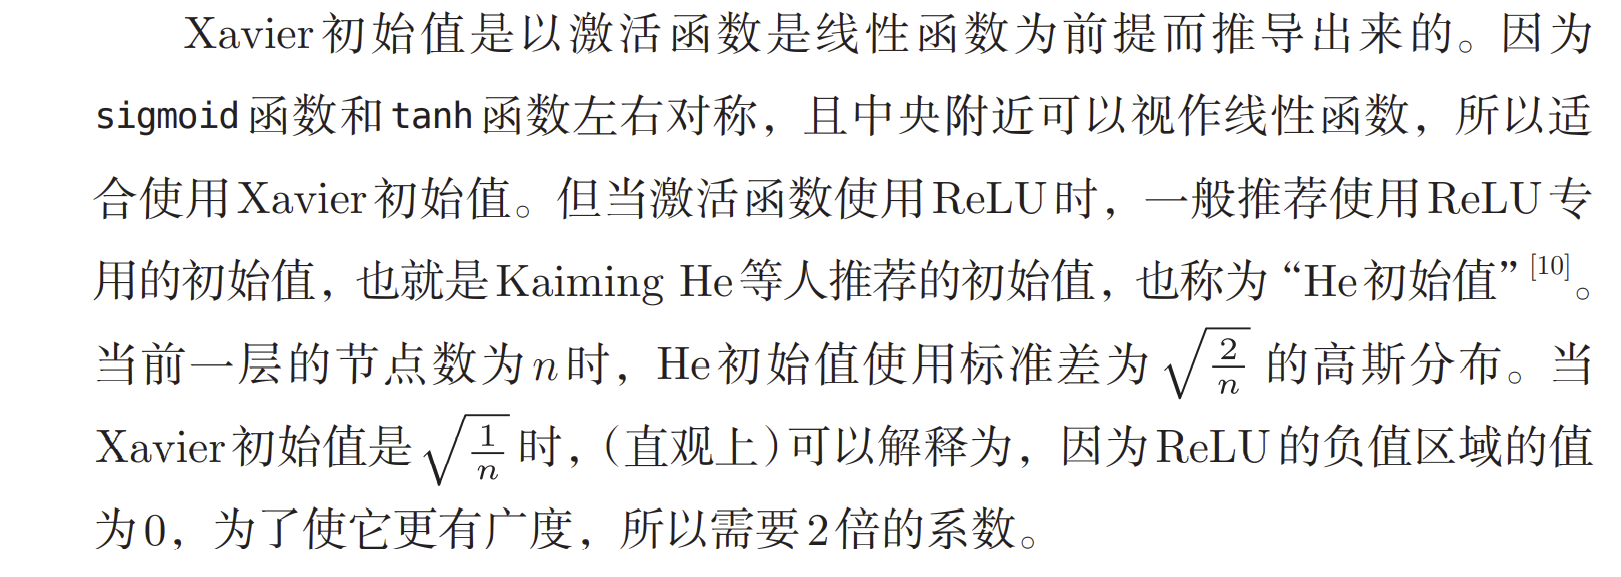

# 初始值设置

- 总结一下，当激活函数使用ReLU时，权重初始值使用He初始值，当激活函数为sigmoid或tanh等S型曲线函数时，初始值使用Xavier初始值，这是目前的最佳实践。

- 如果设定了合适的权重初始值，则各层的激活值分布会有适当的广度，从而可以顺利地进行学习。

# Batch Normalization
- 为了使得各层拥有适当的广度，“强制性”地调整激活值的分布

## 优点
- 可以使学习快速进行（可以增大学习率）。
- 不那么依赖初始值（对于初始值不用那么神经质）。
- 抑制过拟合（降低Dropout等的必要性）。

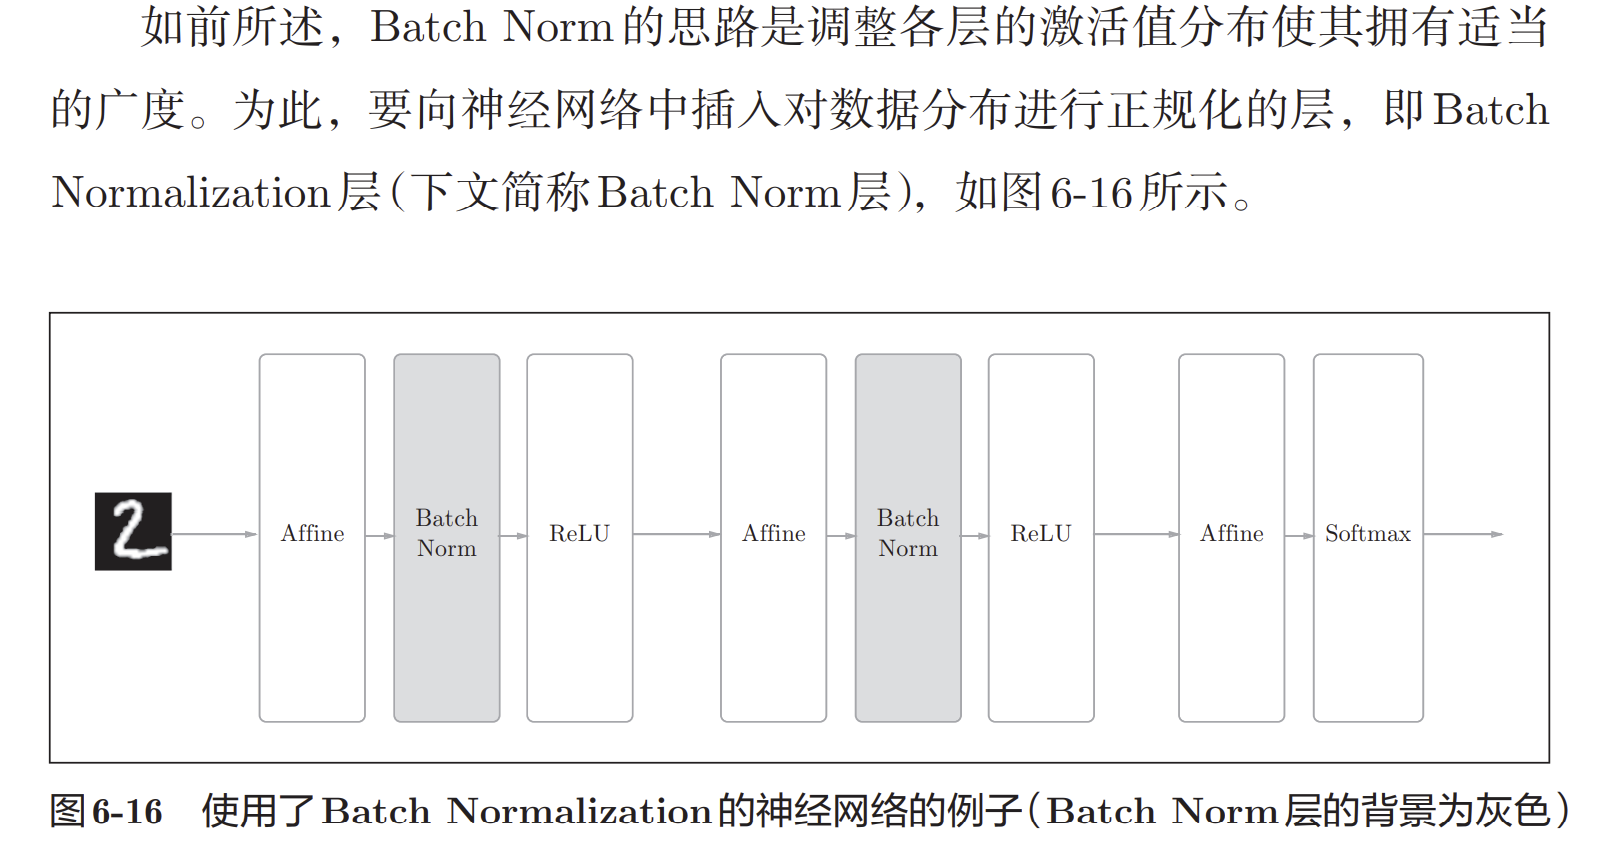
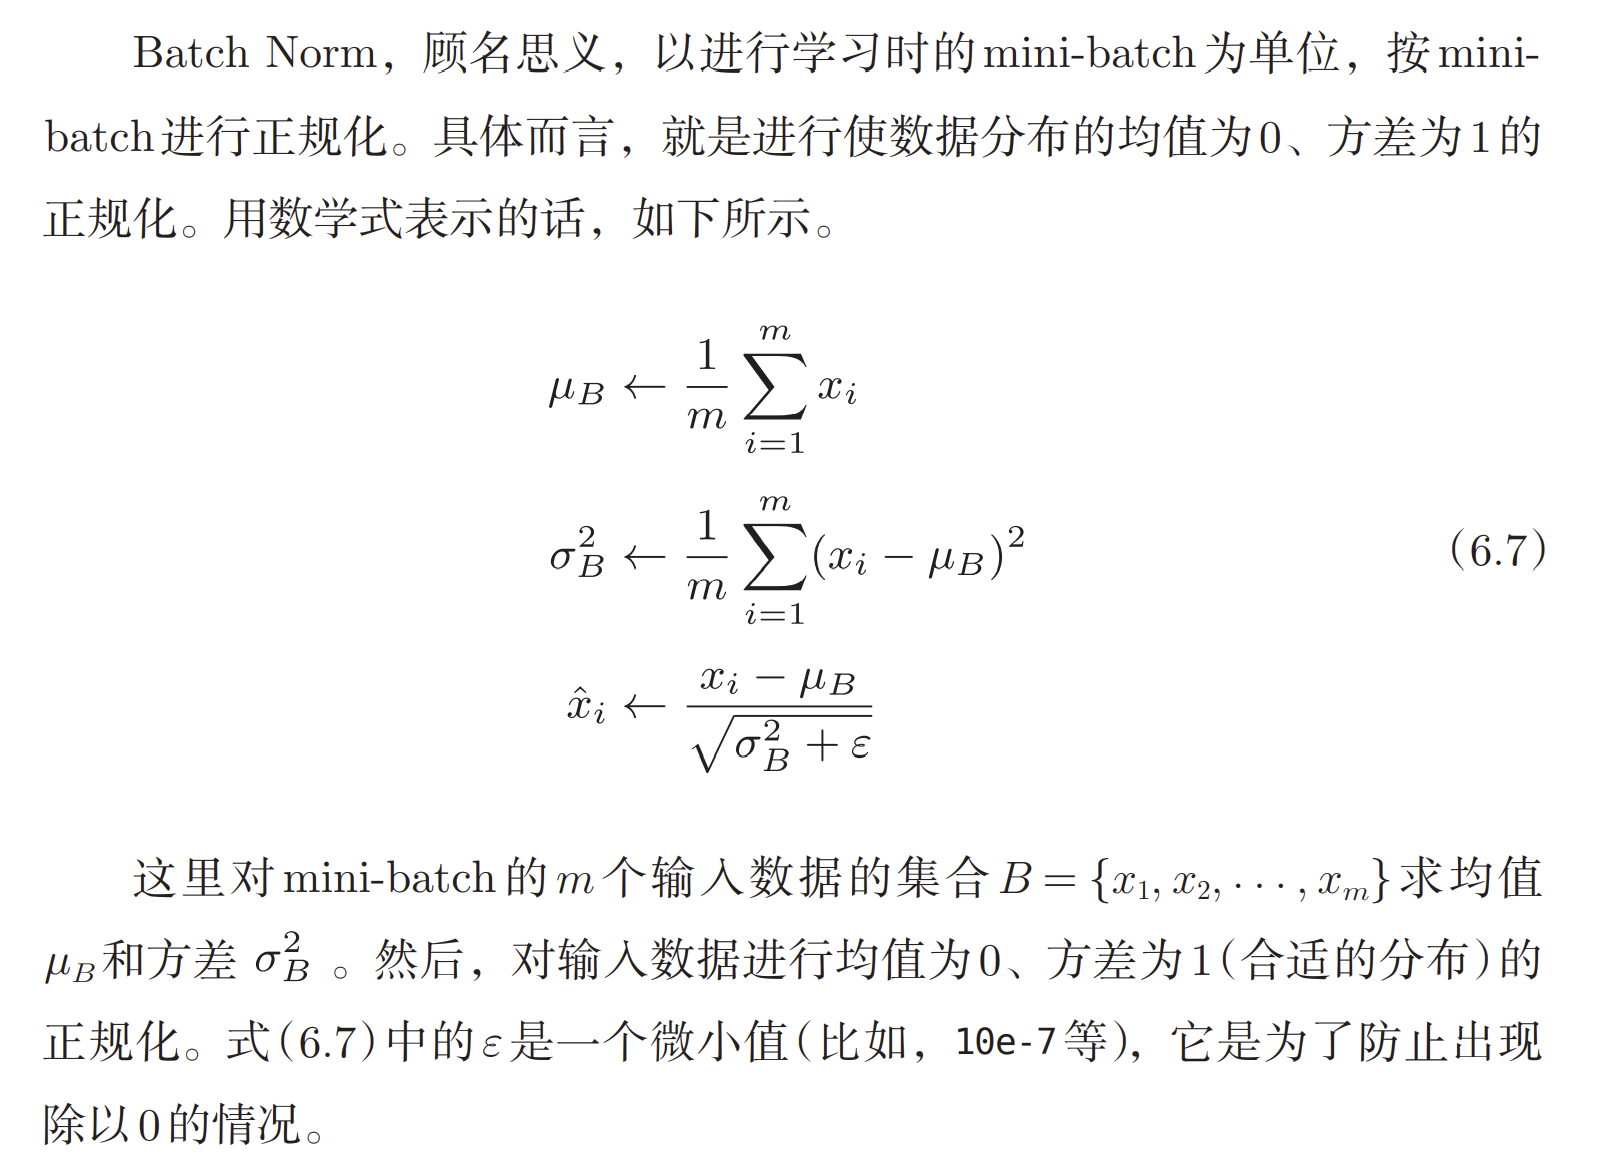
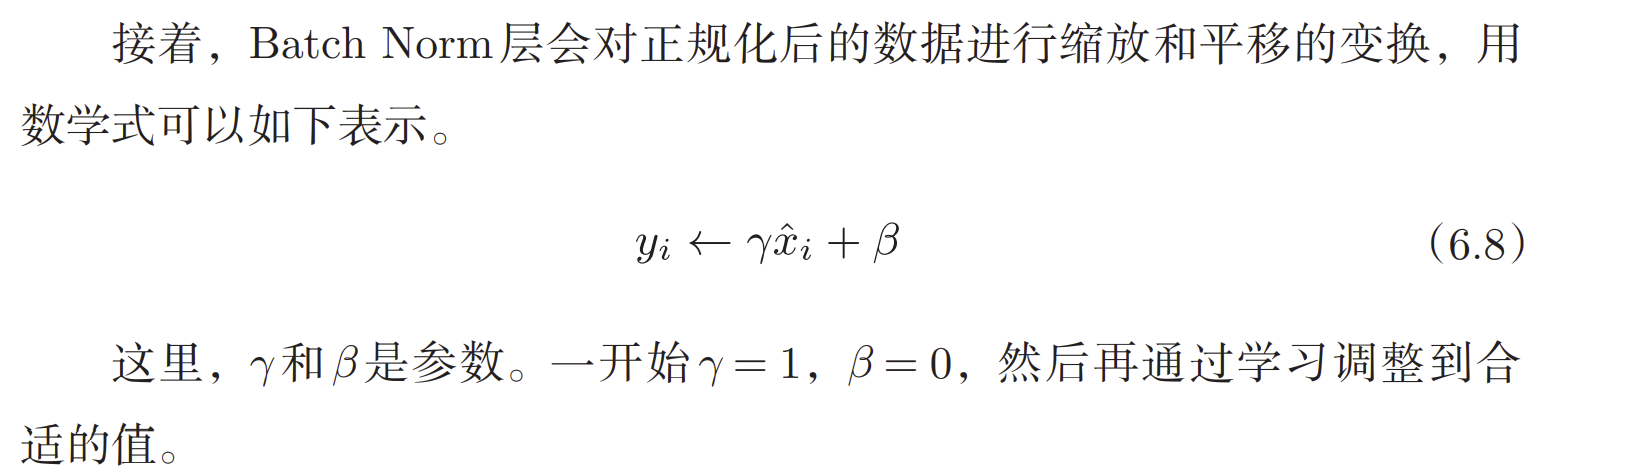

# 正则化

- 过拟合：过拟合指的是只能拟合训练数据，但不能很好地拟合不包含在训练数据中的其他数据的状态。机器学习的目标是提高泛化能力，即便是没有包含在训练数据里的未观测数据，也希望模型可以进行正确的识别。

## 过拟合的原因

- 模型拥有大量参数、表现力强。
- 训练数据少。

## 权重衰减
- 通过在学习过程中对大的权重进行惩罚，来抑制过拟合

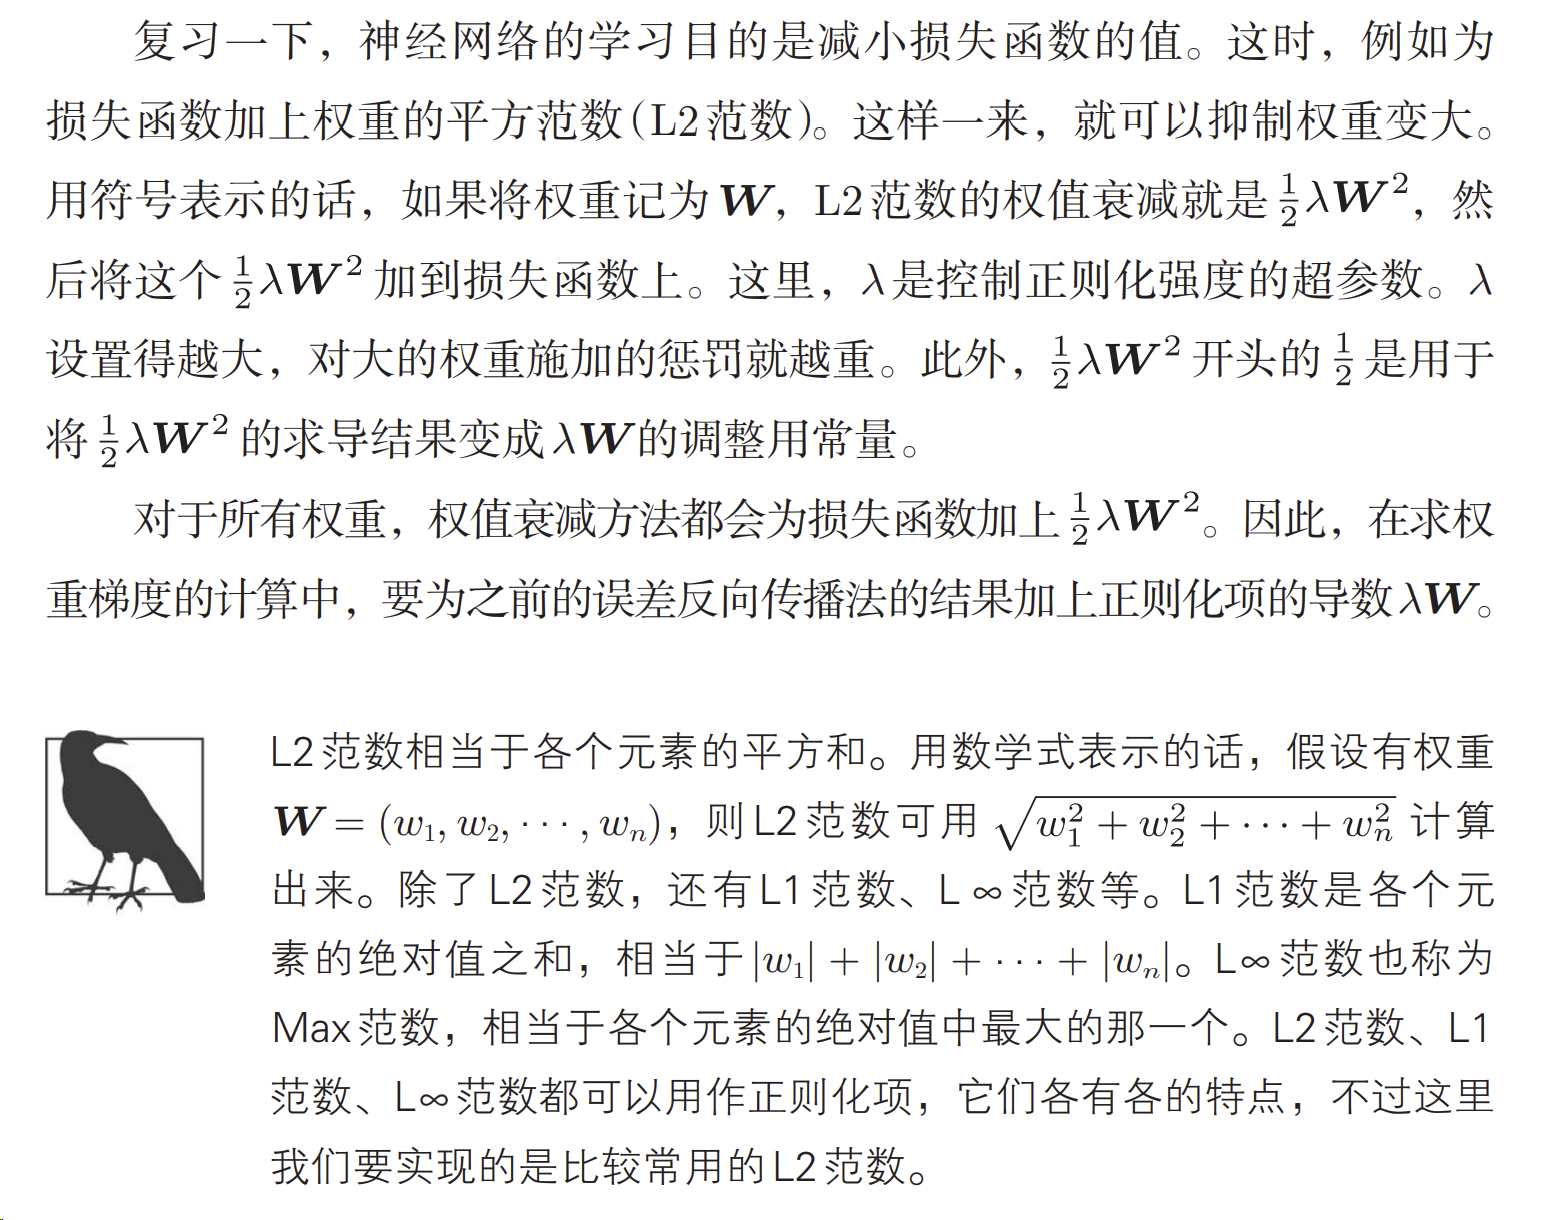


In [11]:
def loss(self, x, t):
    y = self.predict(x)

    weight_decay = 0
    for idx in range(1, self.hidden_layer_num + 2):
        W = self.params['W' + str(idx)]
        weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)

    return self.last_layer.forward(y, t) + weight_decay

# Dropout

- Dropout是一种在学习的过程中随机删除神经元的方法。训练时，随机选出隐藏层的神经元，然后将其删除。被删除的神经元不再进行信号的传递，训练时，每传递一次数据，就会随机选择要删除的神经元。然后，测试时，虽然会传递所有的神经元信号，但是对于各个神经元的输出，要乘上训练时的删除比例后再输出。

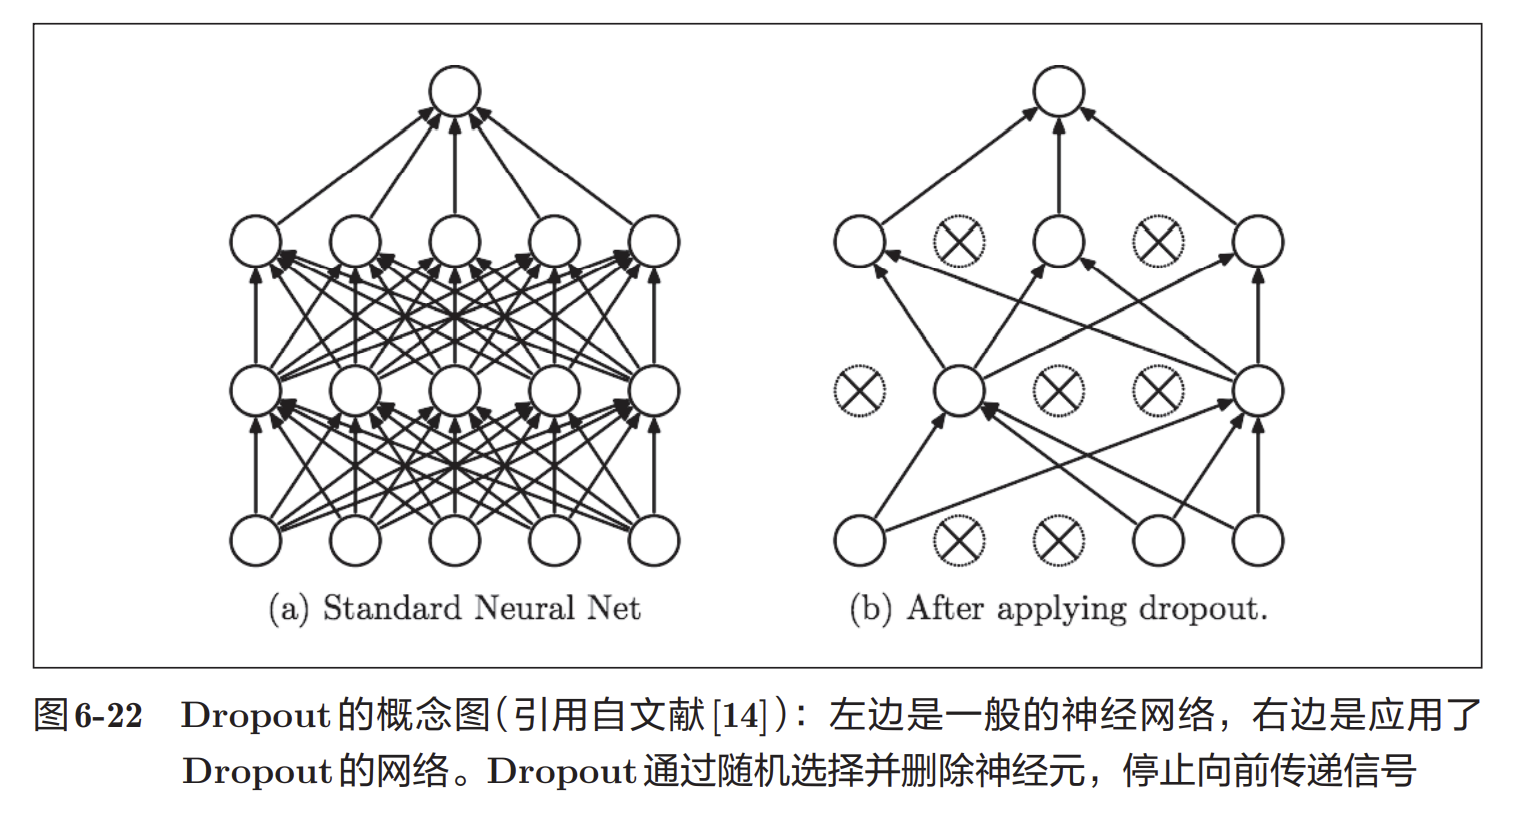


# 集成学习
- 就是让多个模型单独进行学习，推理时再取多个模型的输出的平均值。用神经网络的语境来说，比如，准备 5个结构相同（或者类似）的网络，分别进行学习，测试时，以这 5个网络的输出的平均值作为答案。实验告诉我们，通过进行集成学习，神经网络的识别精度可以提高好几个百分点。这个集成学习与 Dropout有密切的关系。这是因为可以将 Dropout理解为，通过在学习过程中随机删除神经元，从而每一次都让不同的模型进行学习。并且，推理时，通过对神经元的输出乘以删除比例（比如，0.5等），可以取得模型的平均值。也就是说，可以理解成，Dropout将集成学习的效果（模拟地）通过一个网络实现了。


# 超参数

- 超参数： 比如各层的神经元数量、batch大小、参数更新时的学习率或权值衰减等。如果这些超参数没有设置合适的值，模型的性能就会很差。虽然超参数的取值非常重要，但是在决定超参数的过程中一般会伴随很多的试错。

### 为什么不能用测试数据评估超参数的性能？

- 因为如果使用测试数据调整超参数，超参数的值会对测试数据发生过拟合。换句话说，用测试数据确认超参数的值的“好坏”，就会导致超参数的值被调整为只拟合测试数据。这样的话，可能就会得到不能拟合其他数据、泛化能力低的模型。因此调整超参数时候，必须使用超参数专用的确认数据。
- 用于调整超参数的数据，一般称为**验证数据**，我们使用验证数据来评估超参数的好坏。
- **训练数据用于参数（权重和偏置）的学习，验证数据用于超参数的性能评估，为了确认泛化能力，要在最后使用（比较理想的是只用一次）测试数据**


### 超参数的最优化
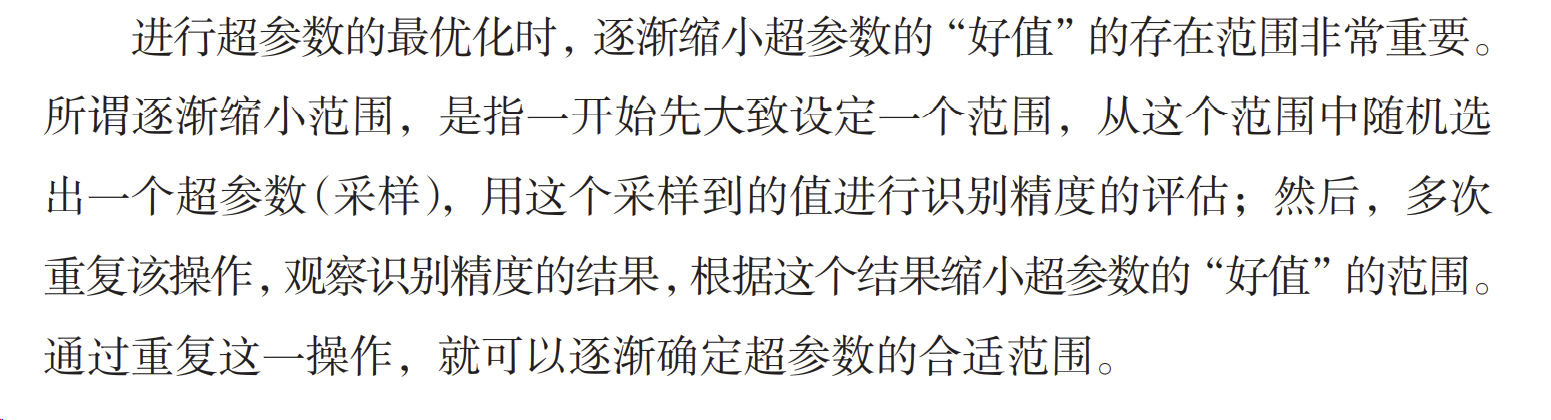

- 在进行神经网络的超参数的最优化时，与网格搜索等有规律的搜索相比，随机采样的搜索方式效果更好。这是因为在多个超参数中，各个超参数对最终的识别精度的影响程度不同。

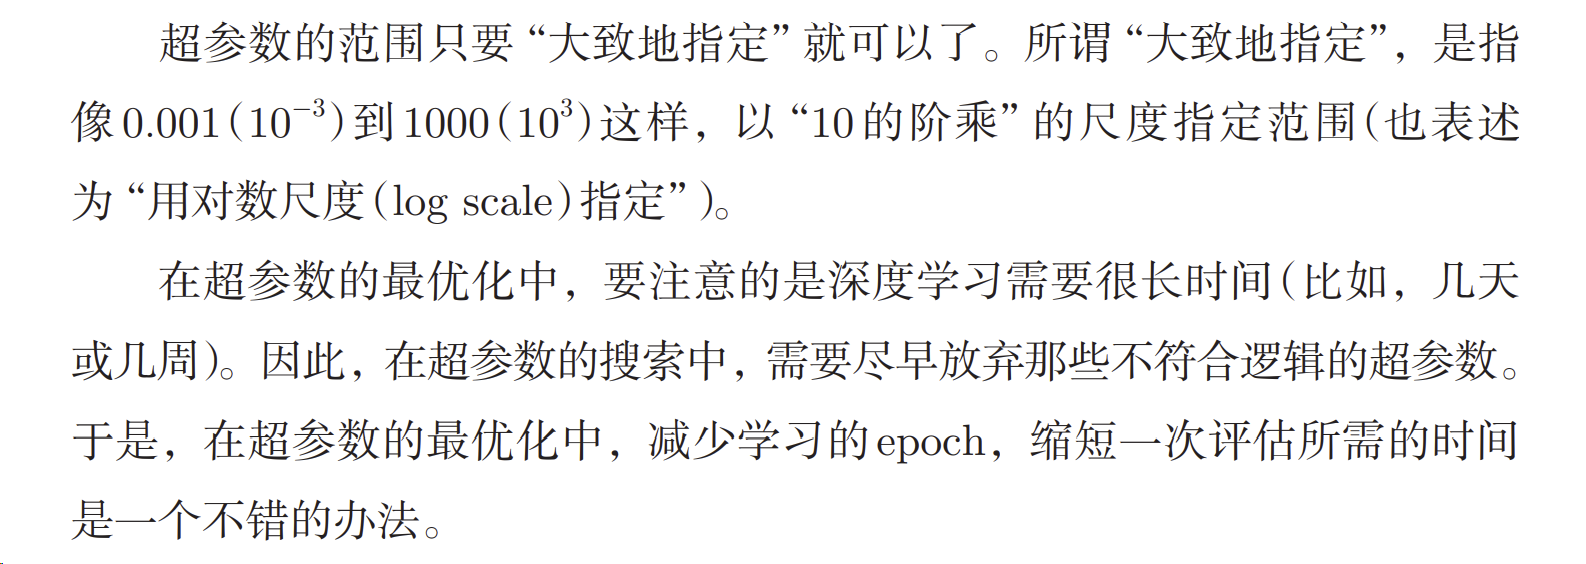


#### 步骤
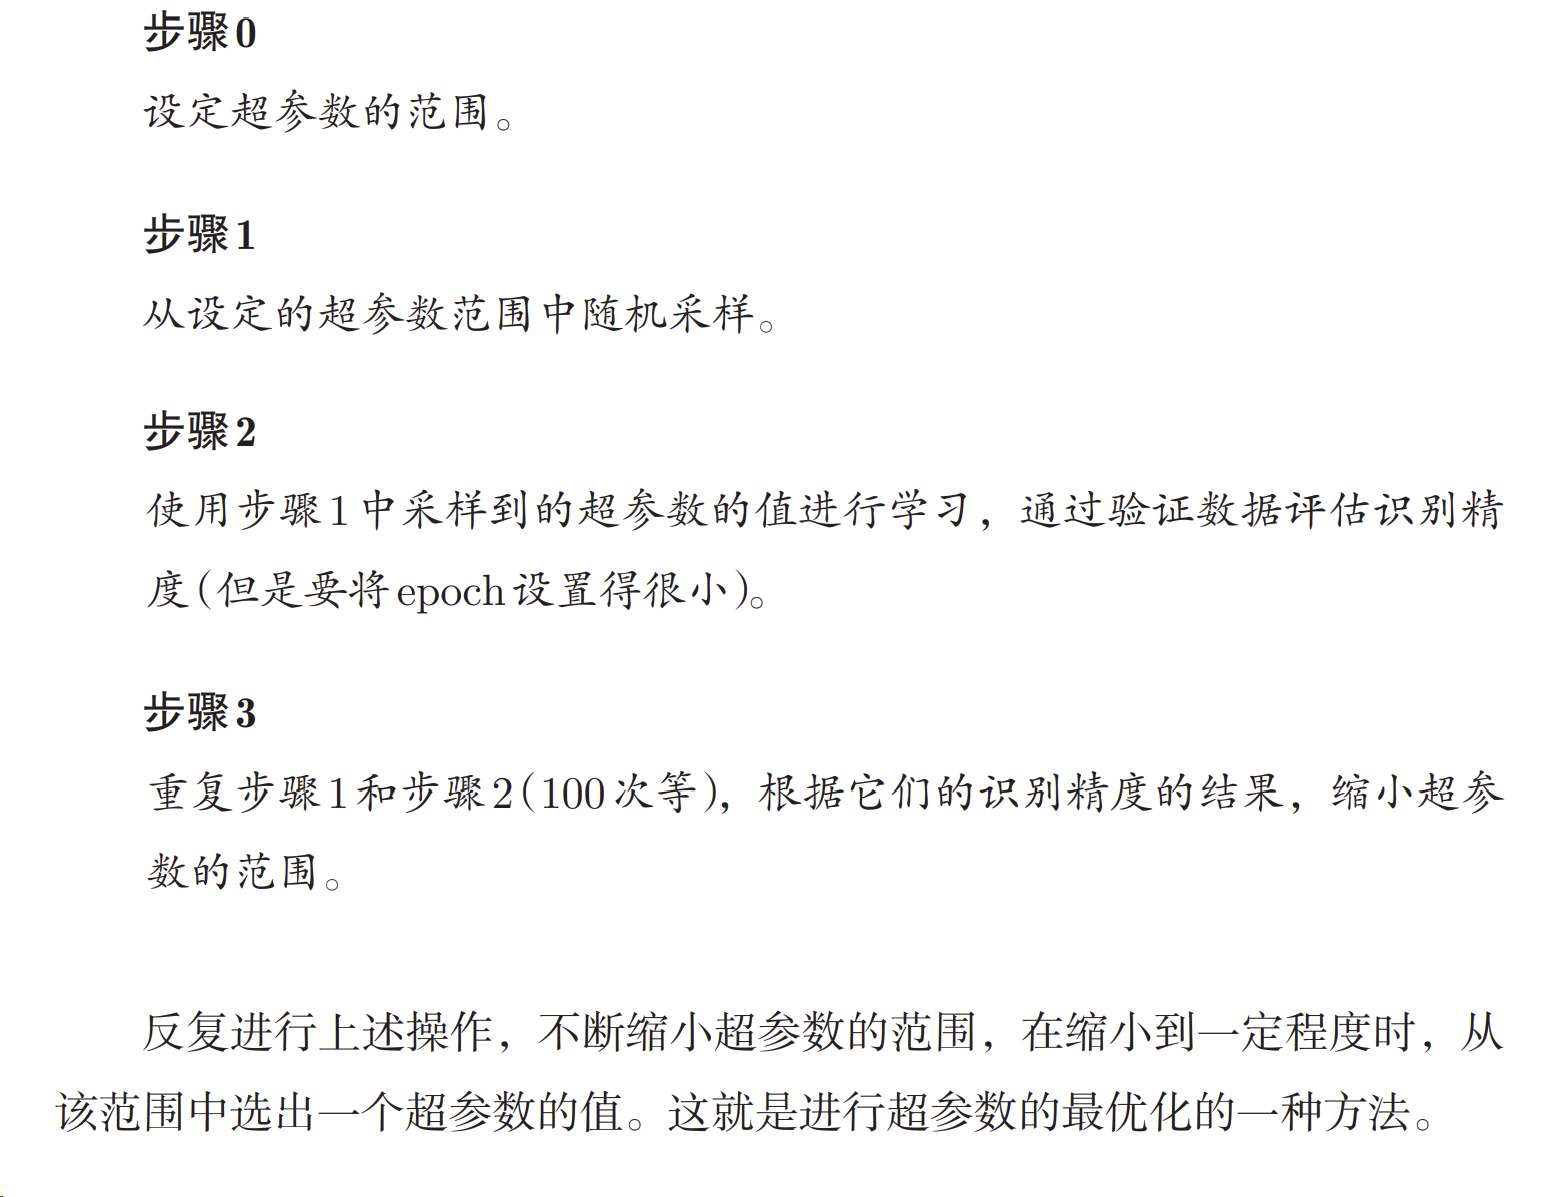

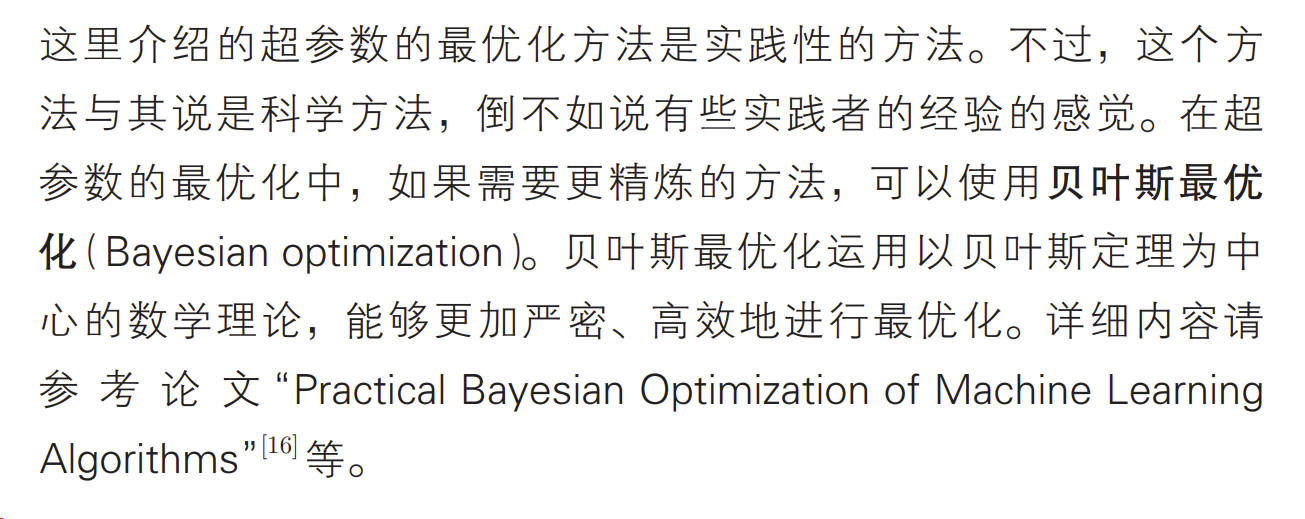

In [27]:
s = np.random.uniform(-1,0,1000)

In [28]:
s

array([-2.86305685e-01, -5.74876448e-01, -5.64953660e-01, -4.03573531e-02,
       -2.78803541e-01, -7.44138922e-02, -2.56626102e-01, -2.23464931e-01,
       -8.98890016e-01, -2.30423774e-01, -7.58005441e-01, -2.59361782e-01,
       -9.73265485e-01, -6.82119654e-01, -9.61121910e-02, -1.69530352e-01,
       -6.46787876e-01, -9.88403513e-01, -9.40315216e-01, -9.44170649e-01,
       -3.72326046e-02, -7.47895357e-01, -2.48506555e-01, -5.87352540e-01,
       -2.63438638e-01, -8.22704910e-01, -7.57802533e-01, -9.59978650e-01,
       -7.64823017e-01, -5.27268158e-01, -4.70575310e-01, -3.39262820e-01,
       -7.85551054e-01, -2.28875117e-01, -6.65313646e-01, -1.49179996e-01,
       -1.85322159e-01, -9.34242353e-01, -7.31031872e-01, -2.75698528e-01,
       -9.65315083e-01, -5.28821864e-01, -5.41711066e-03, -1.27870492e-01,
       -9.76251298e-02, -7.75118553e-01, -9.95562644e-01, -3.11043678e-01,
       -2.80630528e-01, -3.08336439e-01, -8.92513046e-01, -9.14258333e-01,
       -4.76502121e-01, -